In [1]:
# Cell 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the feature-selected dataset
df = pd.read_csv('../data/final_selected_features_heart_disease.csv')

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data successfully loaded and split.")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Data successfully loaded and split.
Training set shape: (242, 10)
Testing set shape: (61, 10)


In [2]:
# Cell 2: Define and train the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42) # probability=True for ROC curve
}

# Dictionary to store results
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    report = classification_report(y_test, y_pred)
    results[name] = report
    
    print(f"--- {name} ---")
    print(report)
    print("\n")

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        33
           1       0.77      0.82      0.79        28

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.77      0.70      0.73        33
           1       0.68      0.75      0.71        28

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



--- Random Forest ---
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.78      0.89      0.83        28

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        6

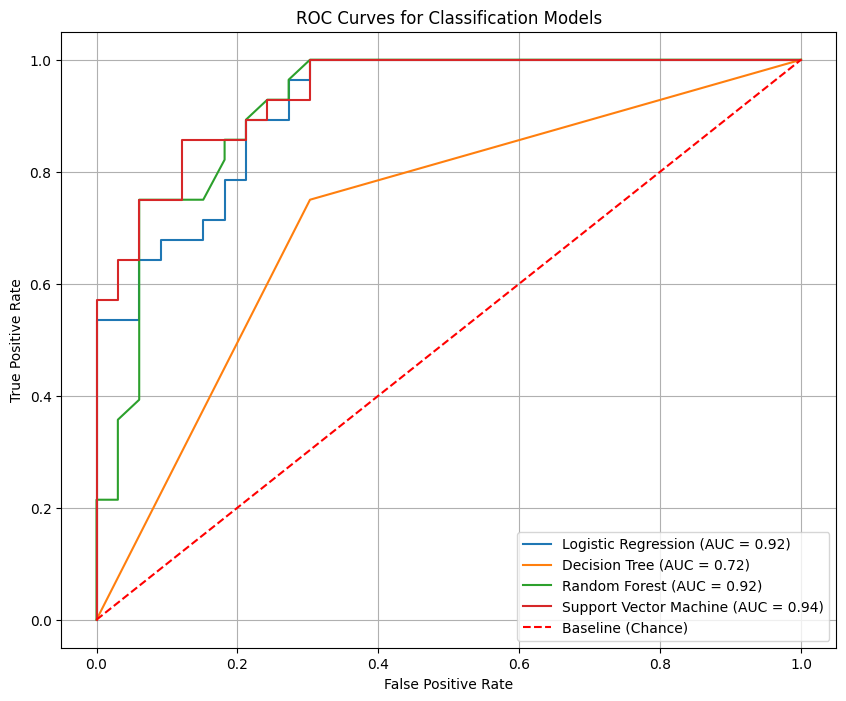

In [3]:
# Cell 3: Plot ROC Curves
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Get prediction probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plotting the baseline
plt.plot([0, 1], [0, 1], 'r--', label='Baseline (Chance)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classification Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()